<a href="https://colab.research.google.com/github/JHyunjun/SNU/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%matplotlib inline #코드에서 matplotlib을 확인할 수 있게하는 것
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Fire and Theft

In [39]:
# Single Linear Regression
#화재와 범죄율의 관계를 확인, x:1000명당 화재율, y:1000가구당 범죄율
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SNU_AI-Master/week1/220707/fire_theft.csv')
df.head()


X   Y
0   6.2  29
1   9.5  44
2  10.5  36
3   7.7  37
4   8.6  53

In [28]:
x_o = df['X'].values #전체가 하나의 벡터 [~~~~]  #.values : numpy array배열로 바꿈(1차원)
print(x_o.shape)
x = df['X'].values.reshape([-1, 1]) #한개씩 각각 벡터 [~],[~],... 
#Reshape은 1차원짜리 Array를 2차원 Array로 바꾸어줌
y = df['Y'].values


(42,)
(42,)


In [25]:
# Fit linear model
reg = LinearRegression().fit(x, y)
print('Coefficient:\n', reg.coef_) #y=ax+b에서 a가 coefficient, b가 Interception
print('Intercept:\n', reg.intercept_)

Coefficient:
 [1.313456]
Intercept:
 16.99515723273957


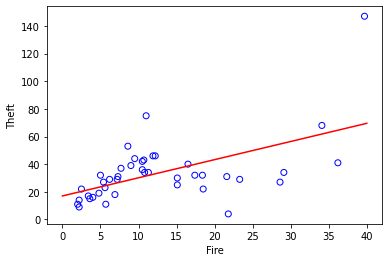

In [17]:
# Draw a scatter plot
plt.scatter(x, y, marker='o', edgecolors='b', facecolor='none')

# Draw the linear regression model
coef = reg.coef_
intercept = reg.intercept_
line_x = np.linspace(0, 40, 100)
line_y = coef[0] * line_x + intercept
plt.plot(line_x, line_y, c='red')

plt.xlabel('Fire')
plt.ylabel('Theft')
plt.show()

In [95]:
# Multiple Linear Regression
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SNU_AI-Master/week1/220707/winequality_red.csv', sep=';')
df.head()
print(df.shape) #[1599,12]

(1599, 12)


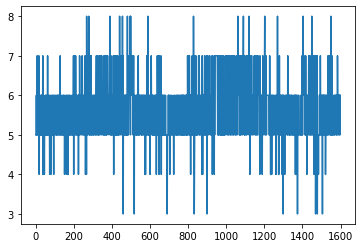

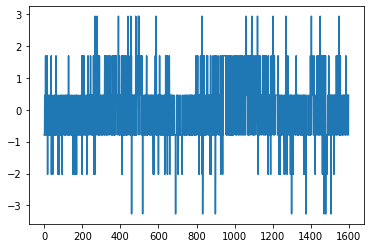

In [112]:
x = df.iloc[:,:-1].values #앞에 11개가 input
y = df['quality'].values.reshape([-1, 1])
plt.show()
plt.plot(y)
y_ss = StandardScaler().fit_transform(y)
plt.show()
plt.plot(y_ss)

In [107]:
# Data-Preprocessing
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x) #평균이 1이고 표준편차가 1인 Normal Distribution으로 Normalizing
#y = StandardScaler().fit_transform(y)
print(x.shape)

(1599, 11)


In [98]:
# Fit linear model
reg = LinearRegression().fit(x, y)
print('Coefficient:\n', reg.coef_) #[1,11]
print('Intercept:\n', reg.intercept_, reg.intercept_.shape) # [1,]

Coefficient:
 [[ 0.04349735 -0.19396667 -0.03555254  0.02301871 -0.08818339  0.04560596
  -0.10735582 -0.03373717 -0.06384247  0.1552765   0.29424288]]
Intercept:
 [5.63602251] (1,)


## Wine Quality Prediction

In [99]:
from sklearn.model_selection import KFold

n_splits = 10
kf = KFold(n_splits)
rmse = 0
count=0

'''
for train_idx, valid_idx in kf.split(x): #10등분을했기에 10번돈다.
    x_train, x_valid = x[train_idx], x[valid_idx] #x_train:[1439,11], x_valid:[160,11]
    y_train, y_valid = y[train_idx], y[valid_idx]
    print(train_idx.shape, valid_idx.shape)
pass
'''
for train_idx, valid_idx in kf.split(x): #10등분을했기에 10번돈다? Why?
    count+=1
    print(count)
    pass
x_train, x_valid = x[train_idx], x[valid_idx] #x_train:[1439,11], x_valid:[160,11]
y_train, y_valid = y[train_idx], y[valid_idx]
print(train_idx.shape, valid_idx.shape)

x_train.reshape([-1,1])
x_valid.reshape([-1,1])

reg1 = LinearRegression().fit(x_train, y_train)
print('Coefficient:\n', reg1.coef_) #y=ax+b에서 a가 coefficient, b가 Interception
print('Intercept:\n', reg1.intercept_)

reg1_predict = reg1.predict(x_valid)
error = reg1_predict - y_valid
rmse += np.sqrt(np.sum(error**2)/len(y_valid))
print(rmse)


1
2
3
4
5
6
7
8
9
10
(1440,) (159,)
Coefficient:
 [[ 0.05125745 -0.18728028 -0.02439727  0.02381672 -0.08344703  0.03961133
  -0.11578455 -0.04257436 -0.03951569  0.15011286  0.28480593]]
Intercept:
 [5.64517785]
0.6985130757721069


In [113]:
# My Check
wine = np.array([2.5, 0.9, 0.5, 2.0, 0.4, 1.1, 5.5, 4.1, 7.7, 3.0, 6.1]).reshape(-1,1)
wine = wine.T
print(wine)
print(wine.shape)
wine_predict = reg.predict(wine)
print(wine_predict)

[[2.5 0.9 0.5 2.  0.4 1.1 5.5 4.1 7.7 3.  6.1]]
(1, 11)
[[6.65369485]]
